# ----------------------------------- Clash of Clans Data Analysis -----------------------------------

![Alt text](https://catholicgamereviews.com/wp-content/uploads/2021/11/CoCloading.jpg)

## About Dataset
**Clash of Clans is a popular mobile game with millions of players worldwide. This dataset contains detailed information about clans in Clash of Clans, including their tags, names, descriptions, locations, points, war statistics, member details, and more.**

**With this dataset as a snapshot of the game eco-system as of 2023, you can analyze clan performance, identify trends, and gain insights into the game's community dynamics.**

## Interesting Task Ideas:
1. Visualize the distribution of clan points and member levels to identify high-performing clans.
2. Analyze war statistics to find the most successful clans in terms of win streaks, war wins, and ties.
3. Determine the most popular clan banners.
4. Investigate the correlation between clan location and clan popularity (or the countries where Clash of Clans is most popular).
5. Find the countries with the highest-ranked players.
6. Identify the most and least family-friendly clans based on the provided flag.
7. Determine the percentage of clans that focus on the Builder Base or Clan Capital.
8. Analyze the distribution of clans in terms of clan points, clan level, clan capital level.

In [100]:
import warnings
warnings.filterwarnings("ignore")

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import requests

from PIL import Image
from io import BytesIO

## Dataset Reading

In [3]:
df = pd.read_csv(r"D:\coc_clans_dataset.csv")
df.head()

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


In [4]:
df.shape

(3559743, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559743 entries, 0 to 3559742
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_tag                        object
 1   clan_name                       object
 2   clan_type                       object
 3   clan_description                object
 4   clan_location                   object
 5   isFamilyFriendly                bool  
 6   clan_badge_url                  object
 7   clan_level                      int64 
 8   clan_points                     int64 
 9   clan_builder_base_points        int64 
 10  clan_versus_points              int64 
 11  required_trophies               int64 
 12  war_frequency                   object
 13  war_win_streak                  int64 
 14  war_wins                        int64 
 15  war_ties                        int64 
 16  war_losses                      int64 
 17  clan_war_league                 object
 18  nu

## Data Preprocessing

In [6]:
df.isnull().sum()

clan_tag                                0
clan_name                              62
clan_type                               0
clan_description                  1351365
clan_location                     1451672
isFamilyFriendly                        0
clan_badge_url                          0
clan_level                              0
clan_points                             0
clan_builder_base_points                0
clan_versus_points                      0
required_trophies                       0
war_frequency                           0
war_win_streak                          0
war_wins                                0
war_ties                                0
war_losses                              0
clan_war_league                         0
num_members                             0
required_builder_base_trophies          0
required_versus_trophies                0
required_townhall_level                 0
clan_capital_hall_level                 0
clan_capital_points               

**Here we can see that our dataset is too large and also the clan_location column has more than 14 lakh null values, so we will drop the clan_location column and this decision helps to reduce the dataset and also handle the missing value present in our dataset.**

In [7]:
count = df['clan_location'].isnull().sum()
count

1451672

In [8]:
# Drop rows where 'clan_location' is empty
df.dropna(subset=['clan_location'], inplace=True)

In [9]:
count = df['clan_description'].isnull().sum()
count

517077

In [10]:
# Drop rows where 'clan_description' is empty
df.dropna(subset=['clan_description'], inplace=True)

In [12]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isnull().sum()

clan_tag            0
clan_name           0
clan_type           0
clan_description    0
clan_location       0
clan_badge_url      0
war_frequency       0
clan_war_league     0
capital_league      0
dtype: int64

In [13]:
df.isnull().sum()

clan_tag                          0
clan_name                         0
clan_type                         0
clan_description                  0
clan_location                     0
isFamilyFriendly                  0
clan_badge_url                    0
clan_level                        0
clan_points                       0
clan_builder_base_points          0
clan_versus_points                0
required_trophies                 0
war_frequency                     0
war_win_streak                    0
war_wins                          0
war_ties                          0
war_losses                        0
clan_war_league                   0
num_members                       0
required_builder_base_trophies    0
required_versus_trophies          0
required_townhall_level           0
clan_capital_hall_level           0
clan_capital_points               0
capital_league                    0
mean_member_level                 0
mean_member_trophies              0
dtype: int64

**Now our dataset have no null values.**

In [15]:
df.shape

(1590994, 27)

## Exploratory Data Analysis.

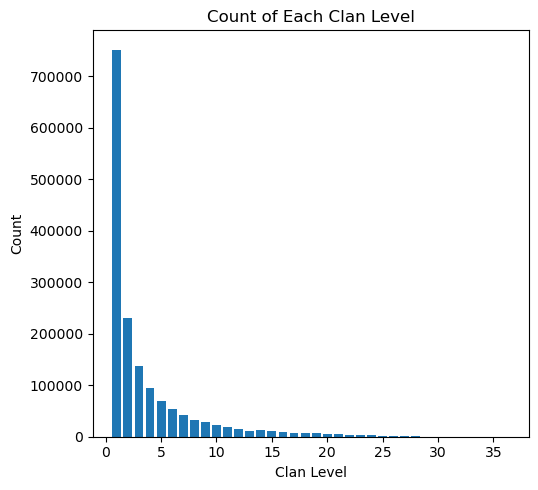

In [17]:
clan_level_counts = df['clan_level'].value_counts()

# Plotting the bar graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.bar(clan_level_counts.index, clan_level_counts.values)
plt.xlabel('Clan Level')
plt.ylabel('Count')
plt.title('Count of Each Clan Level')

plt.tight_layout()
plt.show()

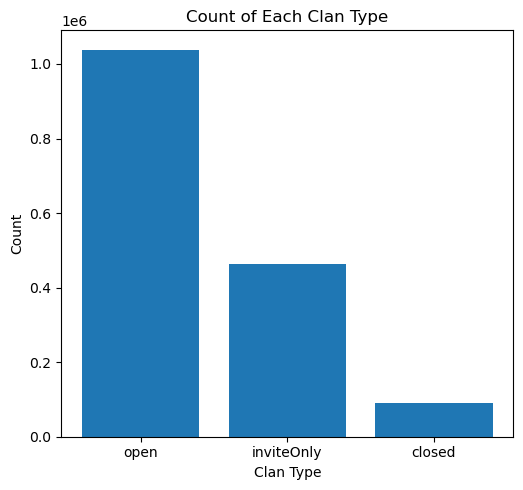

In [18]:
clan_type_counts = df['clan_type'].value_counts()

# Plotting the bar graphs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(clan_type_counts.index, clan_type_counts.values)
plt.xlabel('Clan Type')
plt.ylabel('Count')
plt.title('Count of Each Clan Type')

plt.tight_layout()
plt.show()

### **1. Visualize the distribution of clan points and member levels to identify high-performing clans.**

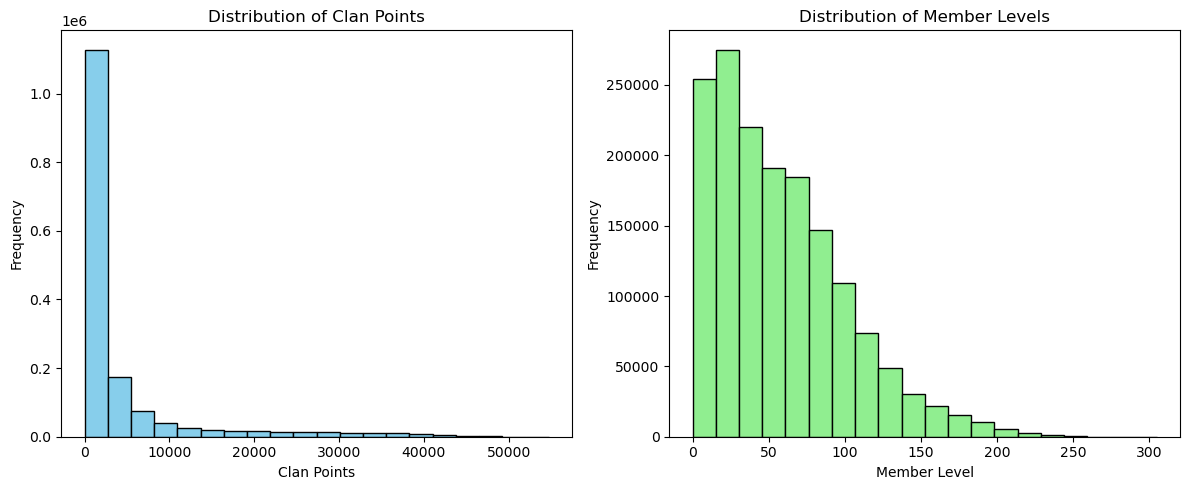

In [20]:
# Plotting histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['clan_points'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Clan Points')
plt.ylabel('Frequency')
plt.title('Distribution of Clan Points')

plt.subplot(1, 2, 2)
plt.hist(df['mean_member_level'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Member Level')
plt.ylabel('Frequency')
plt.title('Distribution of Member Levels')

plt.tight_layout()
plt.show()

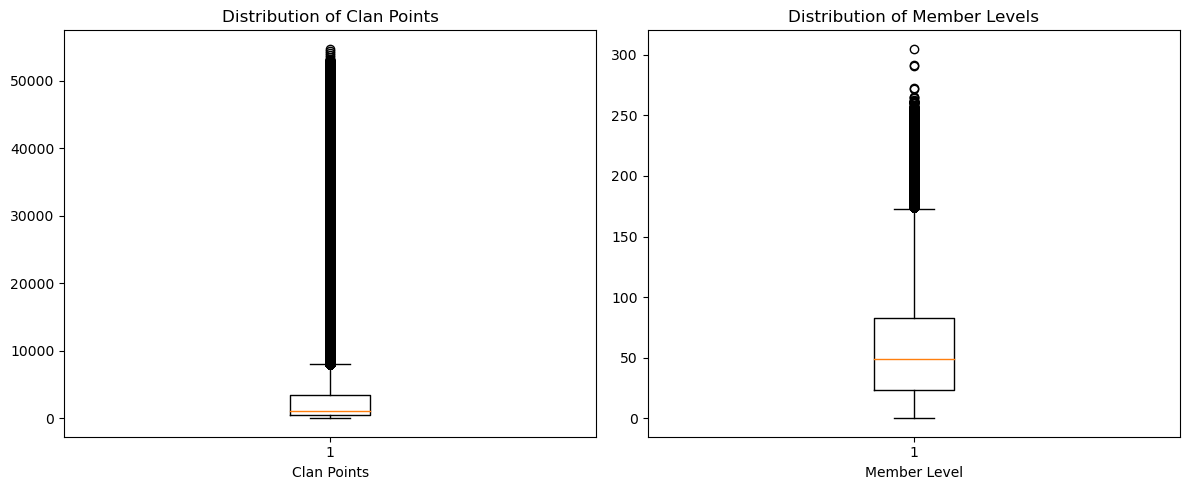

In [21]:
# Plotting Box plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['clan_points'])
plt.xlabel('Clan Points')
plt.title('Distribution of Clan Points')

plt.subplot(1, 2, 2)
plt.boxplot(df['mean_member_level'])
plt.xlabel('Member Level')
plt.title('Distribution of Member Levels')

plt.tight_layout()
plt.show()

### **2. Analyze war statistics to find the most successful clans in terms of win streaks, war wins, and ties.**

In [22]:
# Calculate win streaks
win_streaks = []
current_streak = 0
for wins in df['war_win_streak']:
    if wins > 0:
        current_streak += 1
    else:
        win_streaks.append(current_streak)
        current_streak = 0
max_win_streak = max(win_streaks)

# Sorting clans based on win streaks, war wins, war losess and ties
clan_stats = df[['clan_tag', 'clan_name', 'war_win_streak', 'war_wins', 'war_losses', 'war_ties']]
clan_stats = clan_stats.set_index('clan_tag')  # Set 'clan_tag' as index column
clan_stats = clan_stats.sort_values(by=['war_win_streak', 'war_wins', 'war_ties'], ascending=False)

top_clans = clan_stats.head(10)
top_clans

,clan_name,war_win_streak,war_wins,war_losses,war_ties
clan_tag,,,,,
#Q0JY088R,OgaHipon,261,599,0,0
#2Y9UJ90CL,Th5 ONLY GDC,260,323,0,0
#YR80PJ2L,Isengard,251,410,0,0
#2288Y0089,ARZAMAS16,239,278,0,0
#YPQV8G9G,cyrus the great,196,281,0,0
#GUJ98JYV,Rush 2049,172,172,0,0
#29VJJU2JQ,Euphoria Tide™,169,187,0,0
#2L0R2J2G2,(WAR) Style PH,169,169,0,0
#C0Q8YY9P,Dry Stack,154,258,0,0


### **3. Determine the most popular clan banners.**

In [23]:
# Count the frequency of each unique clan banner
banner_counts = df['clan_badge_url'].value_counts()

# Sort the banners based on their frequency
popular_banners = banner_counts.head(10)

# Display the most popular clan banners
print("Top 10 Most Popular Clan Banners:")
print(popular_banners)

Top 10 Most Popular Clan Banners:
clan_badge_url
https://api-assets.clashofclans.com/badges/200/DcHcgP14dK0OPmf_G77JtangGL7_5u6oAOWUbbXP8Yw.png    61048
https://api-assets.clashofclans.com/badges/200/BIZ4D9ihzimhDQ4y8GKb0VbXvJKDiLVIJ_MyIQxDVLA.png    25858
https://api-assets.clashofclans.com/badges/200/ZVv653CzXMnlObUmgcD4vuFvsF2mYcr_bh1y-w6P0ds.png    22547
https://api-assets.clashofclans.com/badges/200/sjGhn78cz9uvrpnUJil23SAGGiRHR63lzEGeXF9S_aM.png    17661
https://api-assets.clashofclans.com/badges/200/aIqH8JUUM0lDBRDcnw0wHe1YqOLvaFWVXPhlo7Q6R_Y.png    17475
https://api-assets.clashofclans.com/badges/200/Sj-xRufxYBYkhRO_Rb1pxLxxkdSkoArCOhbAINmMGgg.png     9436
https://api-assets.clashofclans.com/badges/200/JOnEdb8kMGHdd6Rv2FVNSCSMM3CCxdzXuJw8rZid4ZE.png     9147
https://api-assets.clashofclans.com/badges/200/WTRJUHvQpO4p5HyK7DHuaAhjl1sdCZwVUAxPrX1drX4.png     8426
https://api-assets.clashofclans.com/badges/200/01Uglh-E9ev5YCMbdnW3DHQRsy4R3YQCJAtsdAZymNg.png     8110
https://api-ass

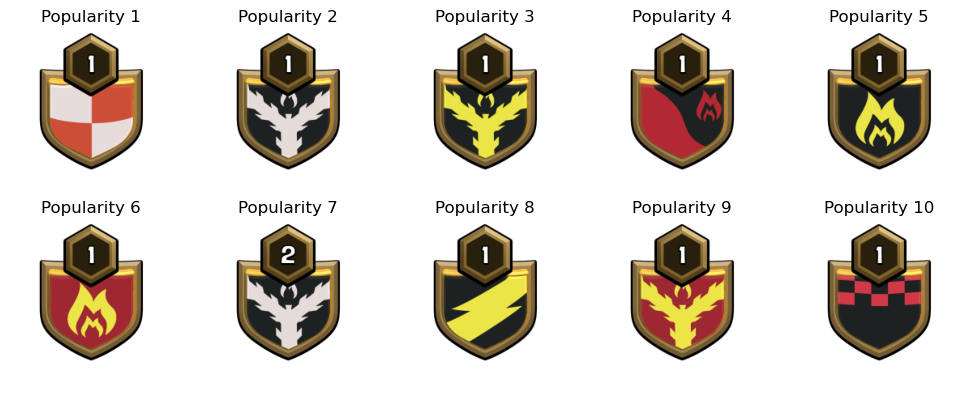

In [101]:
image_urls = [
    ('https://api-assets.clashofclans.com/badges/200/DcHcgP14dK0OPmf_G77JtangGL7_5u6oAOWUbbXP8Yw.png', 1),
    ('https://api-assets.clashofclans.com/badges/200/BIZ4D9ihzimhDQ4y8GKb0VbXvJKDiLVIJ_MyIQxDVLA.png', 2),
    ('https://api-assets.clashofclans.com/badges/200/ZVv653CzXMnlObUmgcD4vuFvsF2mYcr_bh1y-w6P0ds.png', 3),
    ('https://api-assets.clashofclans.com/badges/200/sjGhn78cz9uvrpnUJil23SAGGiRHR63lzEGeXF9S_aM.png', 4),
    ('https://api-assets.clashofclans.com/badges/200/aIqH8JUUM0lDBRDcnw0wHe1YqOLvaFWVXPhlo7Q6R_Y.png', 5),
    ('https://api-assets.clashofclans.com/badges/200/Sj-xRufxYBYkhRO_Rb1pxLxxkdSkoArCOhbAINmMGgg.png', 6),
    ('https://api-assets.clashofclans.com/badges/200/JOnEdb8kMGHdd6Rv2FVNSCSMM3CCxdzXuJw8rZid4ZE.png', 7),
    ('https://api-assets.clashofclans.com/badges/200/WTRJUHvQpO4p5HyK7DHuaAhjl1sdCZwVUAxPrX1drX4.png', 8),
    ('https://api-assets.clashofclans.com/badges/200/01Uglh-E9ev5YCMbdnW3DHQRsy4R3YQCJAtsdAZymNg.png', 9),
    ('https://api-assets.clashofclans.com/badges/200/Xt6TstFBM4My4XswA7j32EK31-jgZlwljVGzbhod95M.png', 10)
]

# Display images with ranks
num_images = len(image_urls)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # Adjust the figure size and layout as needed

for i, (url, rank) in enumerate(image_urls):
    row = i // 5
    col = i % 5

    # Fetch image from URL
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

    # Display image with rank title
    axes[row, col].imshow(image)
    axes[row, col].set_title('Popularity {}'.format(rank), fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### **4. Investigate the correlation between clan location and clan popularity (or the countries where Clash of Clans is most popular).**

In [24]:
# first we analyse the clan location distribution.
location_counts = df['clan_location'].value_counts()
location_counts

clan_location
International       385764
Indonesia           193701
United States       111055
Philippines          84525
India                73633
                     ...  
Tokelau                 47
South Sudan             47
Saint Barthélemy        45
Sierra Leone            37
Liberia                 35
Name: count, Length: 255, dtype: int64

In [25]:
# determining the clan popularity 
clan_popularity = df.groupby('clan_location')['clan_points'].mean()
clan_popularity

clan_location
Afghanistan        2437.722061
Albania            1752.815914
Algeria            1827.735800
American Samoa     1568.422532
Andorra            1656.855609
                      ...     
Western Sahara    11150.917722
Yemen              3747.452569
Zambia             3003.475000
Zimbabwe           3071.279206
Åland Islands      2527.296173
Name: clan_points, Length: 255, dtype: float64

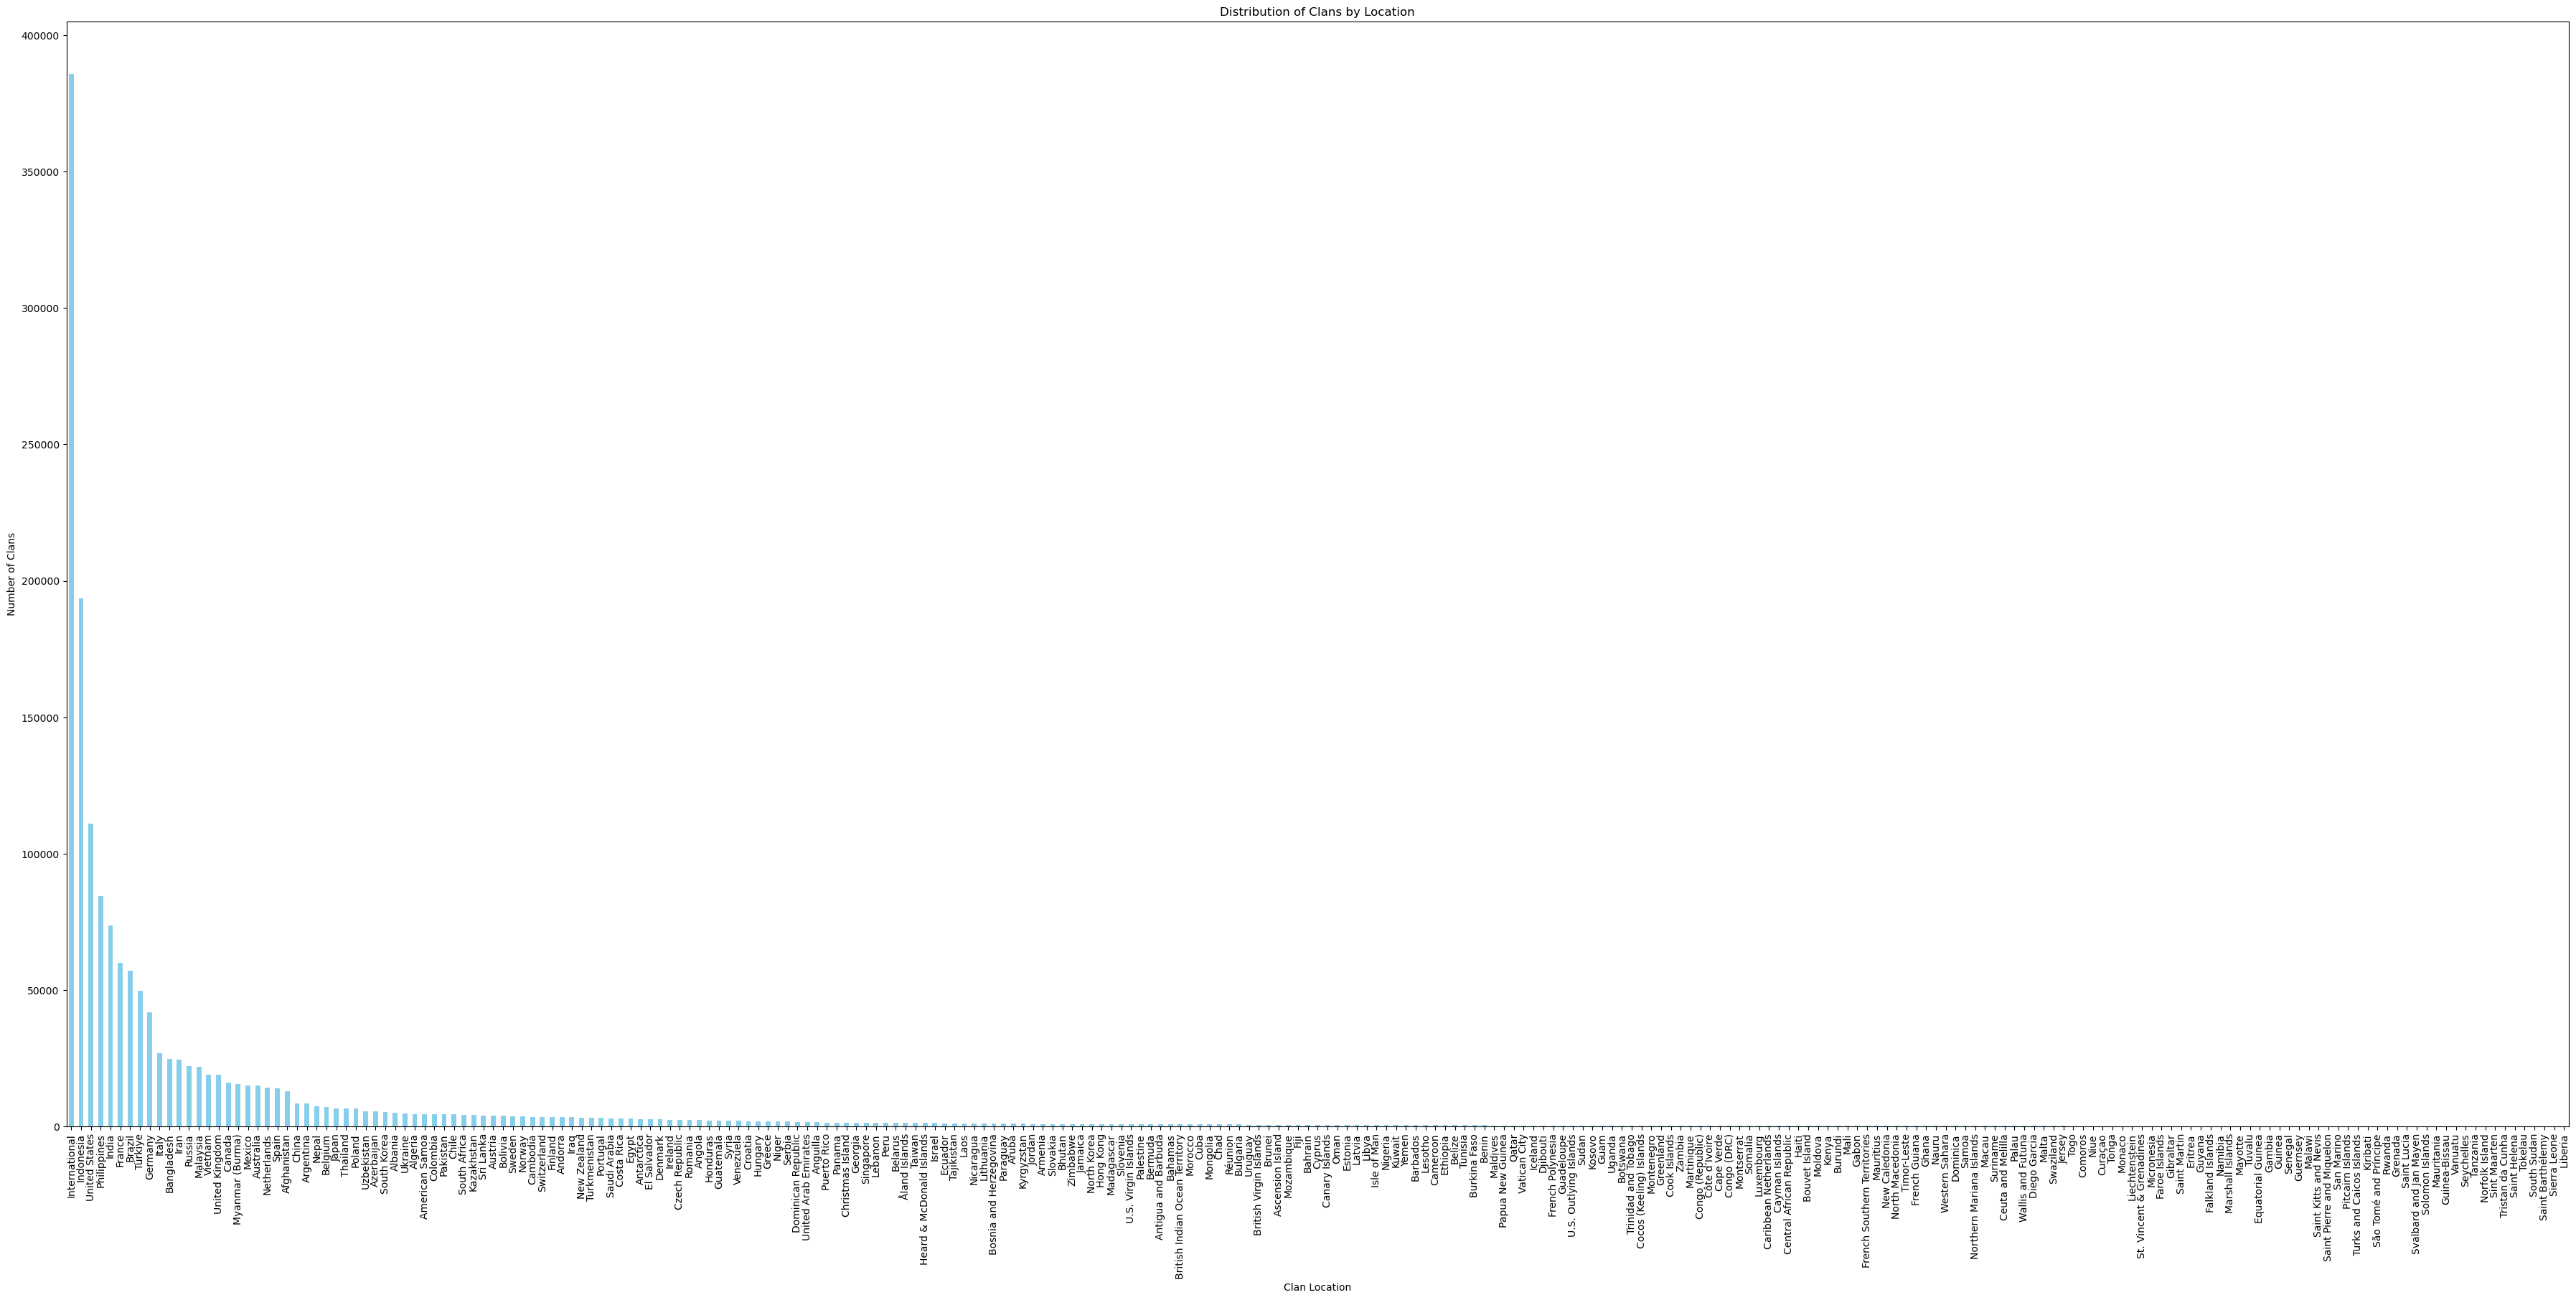

In [35]:
plt.figure(figsize=(45, 20))
location_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Clan Location')
plt.ylabel('Number of Clans')
plt.title('Distribution of Clans by Location')
plt.xticks(rotation=90)
plt.show()

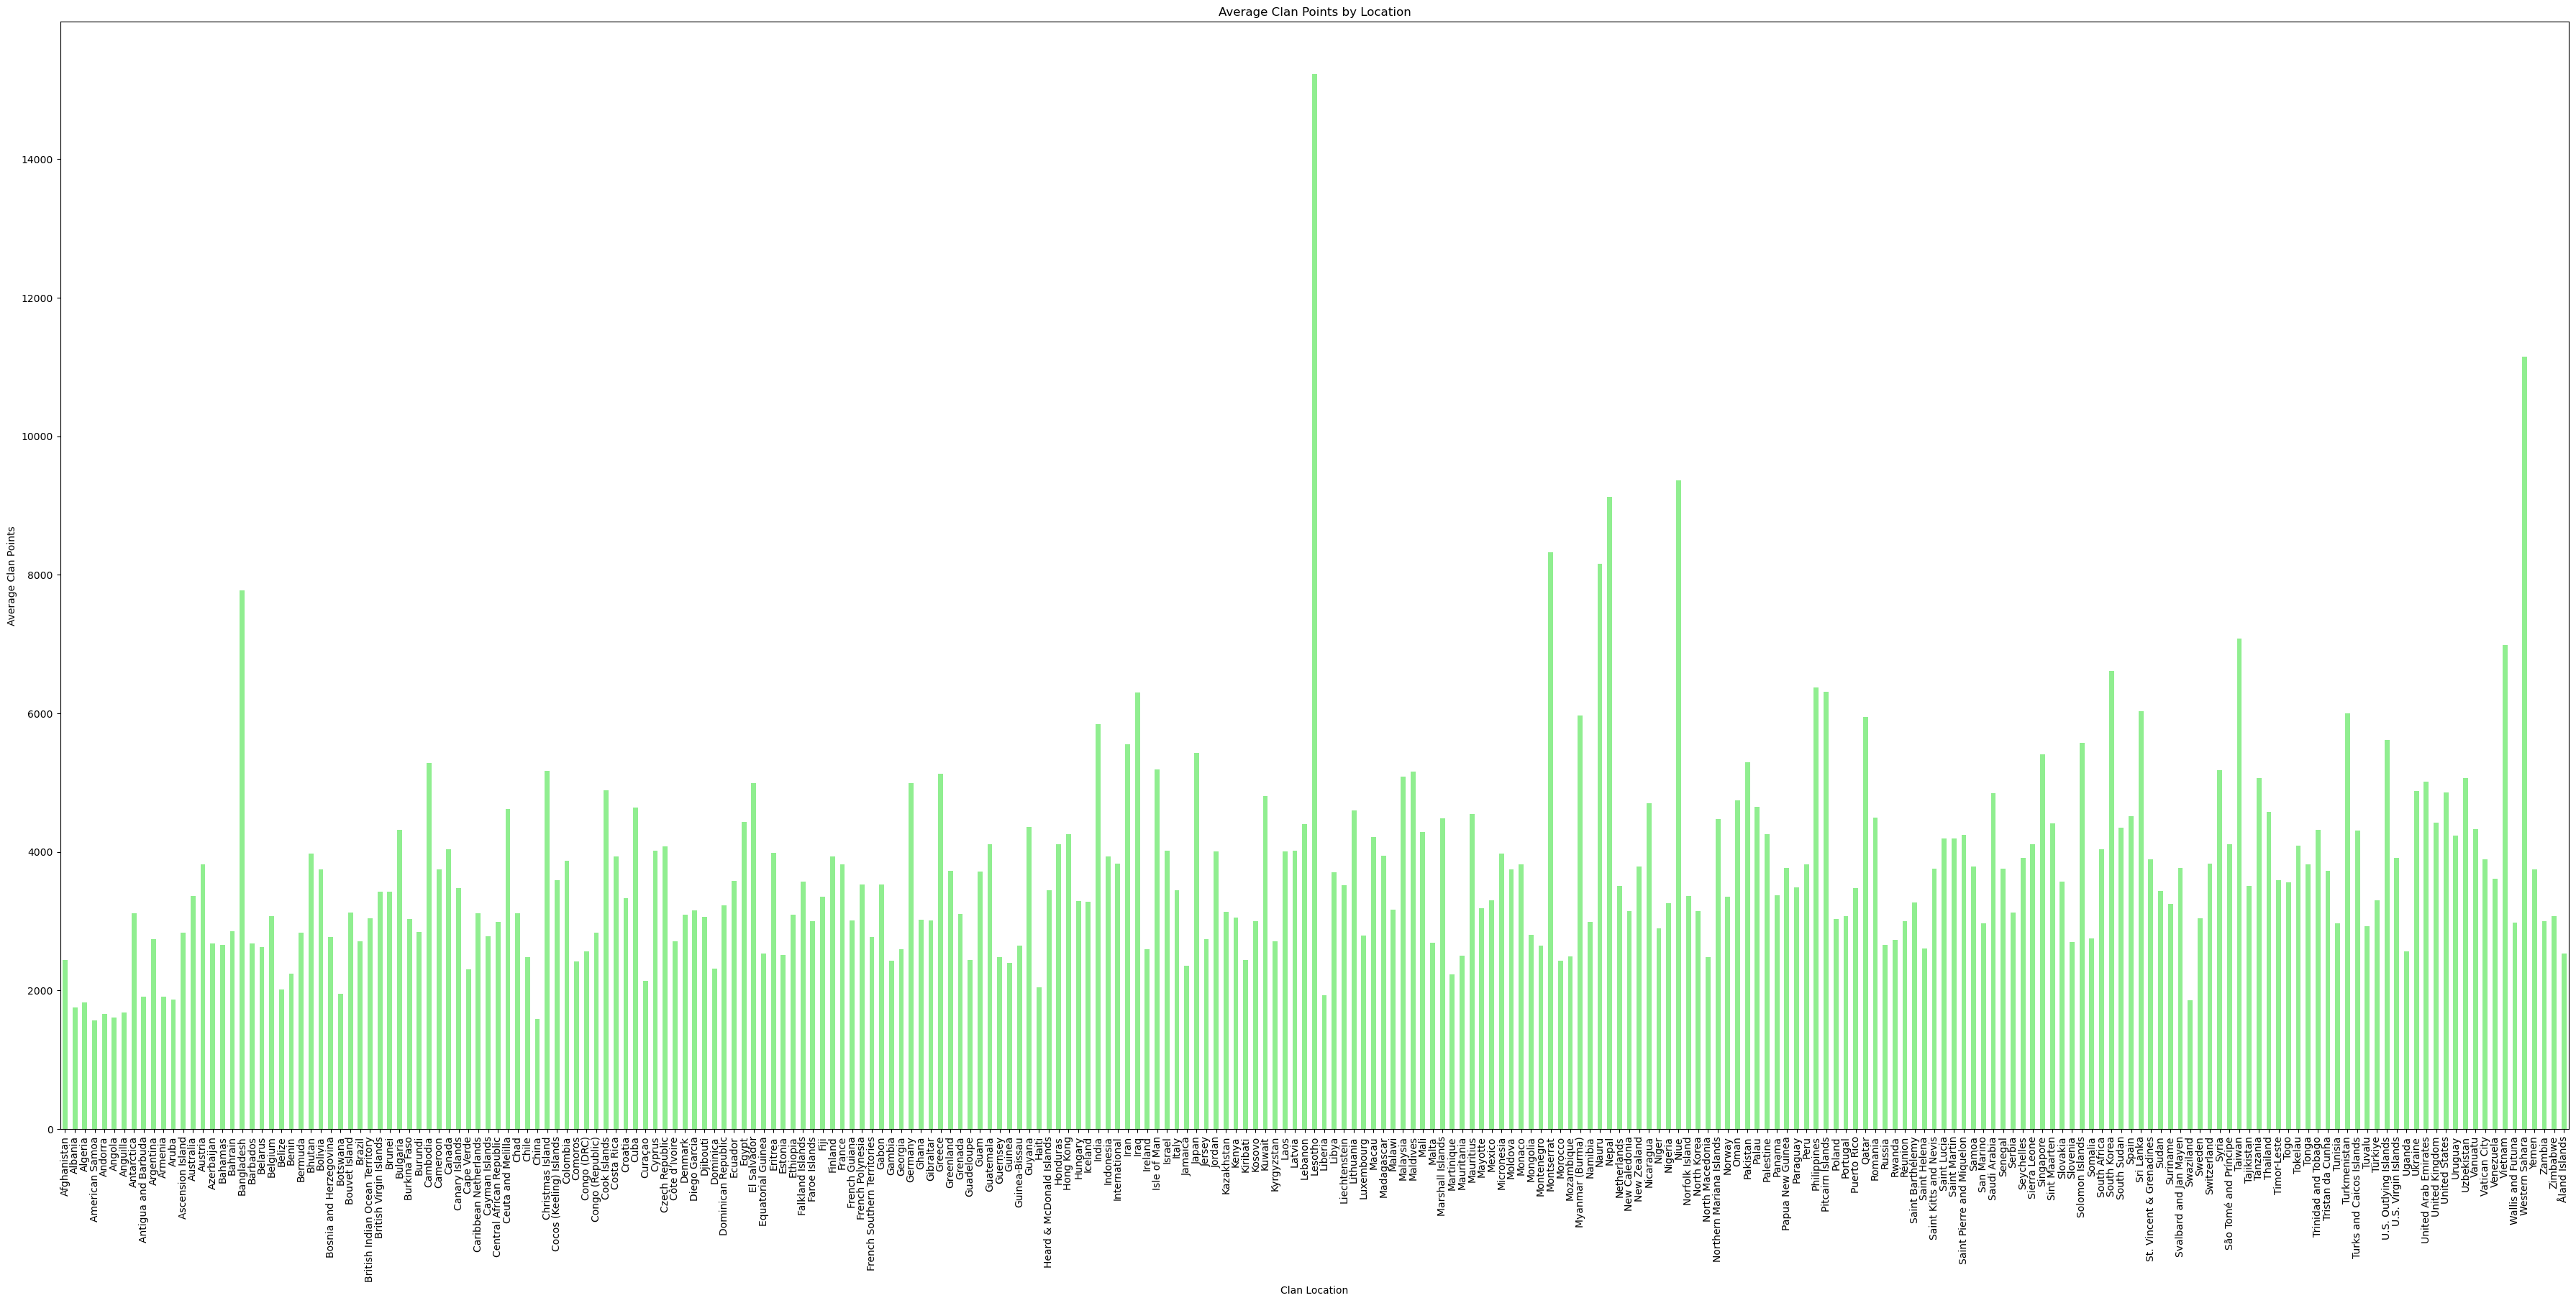

In [33]:
plt.figure(figsize=(45, 20))
clan_popularity.plot(kind='bar', color='lightgreen')
plt.xlabel('Clan Location')
plt.ylabel('Average Clan Points')
plt.title('Average Clan Points by Location')
plt.xticks(rotation=90)
plt.show()

### **5. Find the countries with the highest-ranked players.**

Top 10 Countries with the Highest-Ranked Players:
clan_location
American Samoa    38.276671
Angola            38.333333
Andorra           38.711814
Albania           38.887230
Algeria           39.281175
Anguilla          39.715940
Dominica          41.718954
Armenia           42.357714
Belize            42.686099
Aruba             43.136853
Name: mean_member_level, dtype: float64


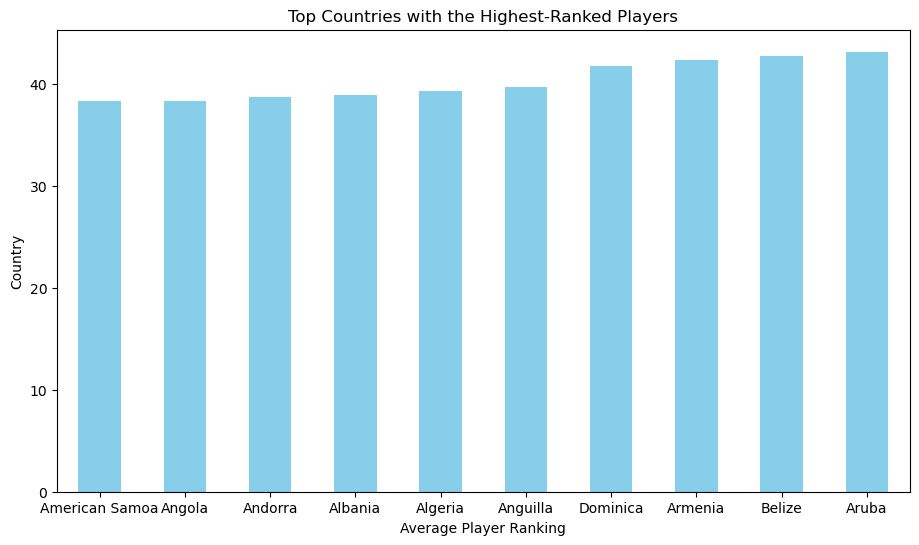

In [48]:
country_rankings = df.groupby('clan_location')['mean_member_level'].mean().sort_values(ascending=True)

# Rank Countries Based on Player Rankings
top_countries = country_rankings.head(10)  # Assuming you want to find the top 10 countries
print("Top 10 Countries with the Highest-Ranked Players:")
print(top_countries)

# Plotting Graph
plt.figure(figsize=(11, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Average Player Ranking')
plt.ylabel('Country')
plt.title('Top Countries with the Highest-Ranked Players')
plt.xticks(rotation=0)
plt.show()

### **6. Identify the most and least family-friendly clans based on the provided flag.**

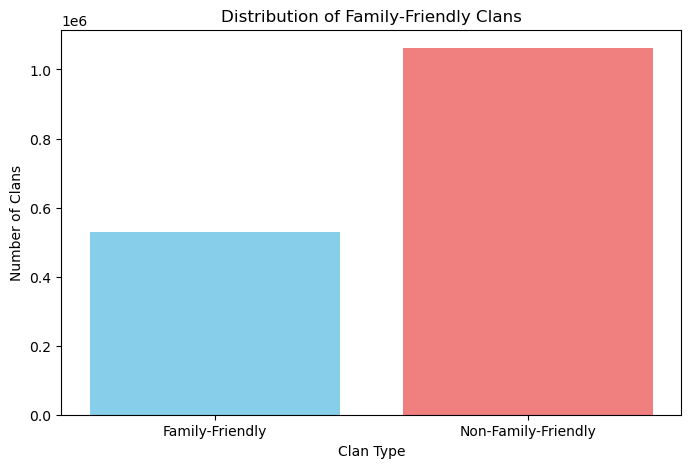

Most Family-Friendly Clans:
         clan_name                                     clan_badge_url
0      KOJIS' CLAN  https://api-assets.clashofclans.com/badges/200...
2  Uprising rivals  https://api-assets.clashofclans.com/badges/200...
3     2inchersonly  https://api-assets.clashofclans.com/badges/200...
4            aymil  https://api-assets.clashofclans.com/badges/200...
7       gryffindor  https://api-assets.clashofclans.com/badges/200...
Least Family-Friendly Clans:
       clan_name                                     clan_badge_url
32764   "ULTRON"  https://api-assets.clashofclans.com/badges/200...
32766  LOJI army  https://api-assets.clashofclans.com/badges/200...
32767  lor kings  https://api-assets.clashofclans.com/badges/200...
32770  UZBEK 030  https://api-assets.clashofclans.com/badges/200...
32771     pp fae  https://api-assets.clashofclans.com/badges/200...


In [61]:
# Count Family-Friendly and Non-Family-Friendly Clans
family_friendly_count = (df['isFamilyFriendly'] == True).sum()
non_family_friendly_count = (df['isFamilyFriendly'] == False).sum()

# Determine the Most and Least Family-Friendly Clans
most_family_friendly_clans = df[df['isFamilyFriendly'] == True][['clan_name', 'clan_badge_url']]
least_family_friendly_clans = df[df['isFamilyFriendly'] == False][['clan_name', 'clan_badge_url']]

# Visualize the Results
plt.figure(figsize=(8, 5))
plt.bar(['Family-Friendly', 'Non-Family-Friendly'], [family_friendly_count, non_family_friendly_count],
        color=['skyblue', 'lightcoral'])
plt.xlabel('Clan Type')
plt.ylabel('Number of Clans')
plt.title('Distribution of Family-Friendly Clans')
plt.show()

print("\033[1mMost Family-Friendly Clans:\033[0m")
print(most_family_friendly_clans.head())

print("\033[1mLeast Family-Friendly Clans:\033[0m")
print(least_family_friendly_clans.head())

### **7. Determine the percentage of clans that focus on the Builder Base or Clan Capital.**

In [62]:
builder_base_count = (df['clan_builder_base_points'] > 0).sum()
clan_capital_count = (df['clan_capital_points'] > 0).sum()

# Total number of clans
total_clans = len(df)

# Calculate the percentage of clans focusing on Builder Base or Clan Capital
builder_base_percentage = (builder_base_count / total_clans) * 100
clan_capital_percentage = (clan_capital_count / total_clans) * 100

print("Percentage of Clans Focusing on Builder Base: {:.2f}%".format(builder_base_percentage))
print("Percentage of Clans Focusing on Clan Capital: {:.2f}%".format(clan_capital_percentage))

Percentage of Clans Focusing on Builder Base: 90.99%
Percentage of Clans Focusing on Clan Capital: 12.31%


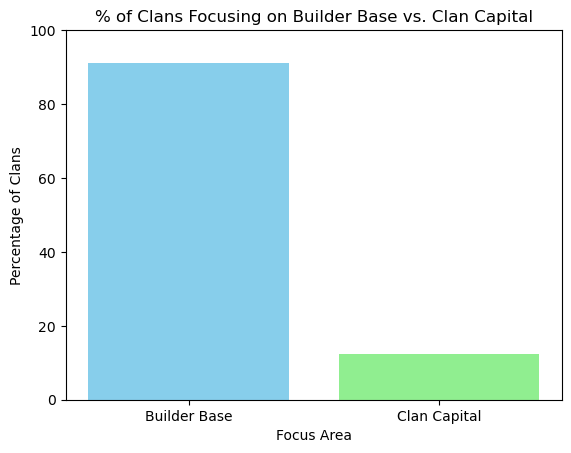

In [67]:
# Plotting the graph
labels = ['Builder Base', 'Clan Capital']
percentages = [builder_base_percentage, clan_capital_percentage]

plt.bar(labels, percentages, color=['skyblue', 'lightgreen'])
plt.xlabel('Focus Area')
plt.ylabel('Percentage of Clans')
plt.title('% of Clans Focusing on Builder Base vs. Clan Capital')
plt.ylim(0, 100)
plt.show()

### **8. Analyze the distribution of clans in terms of clan points, clan level, clan capital level.**

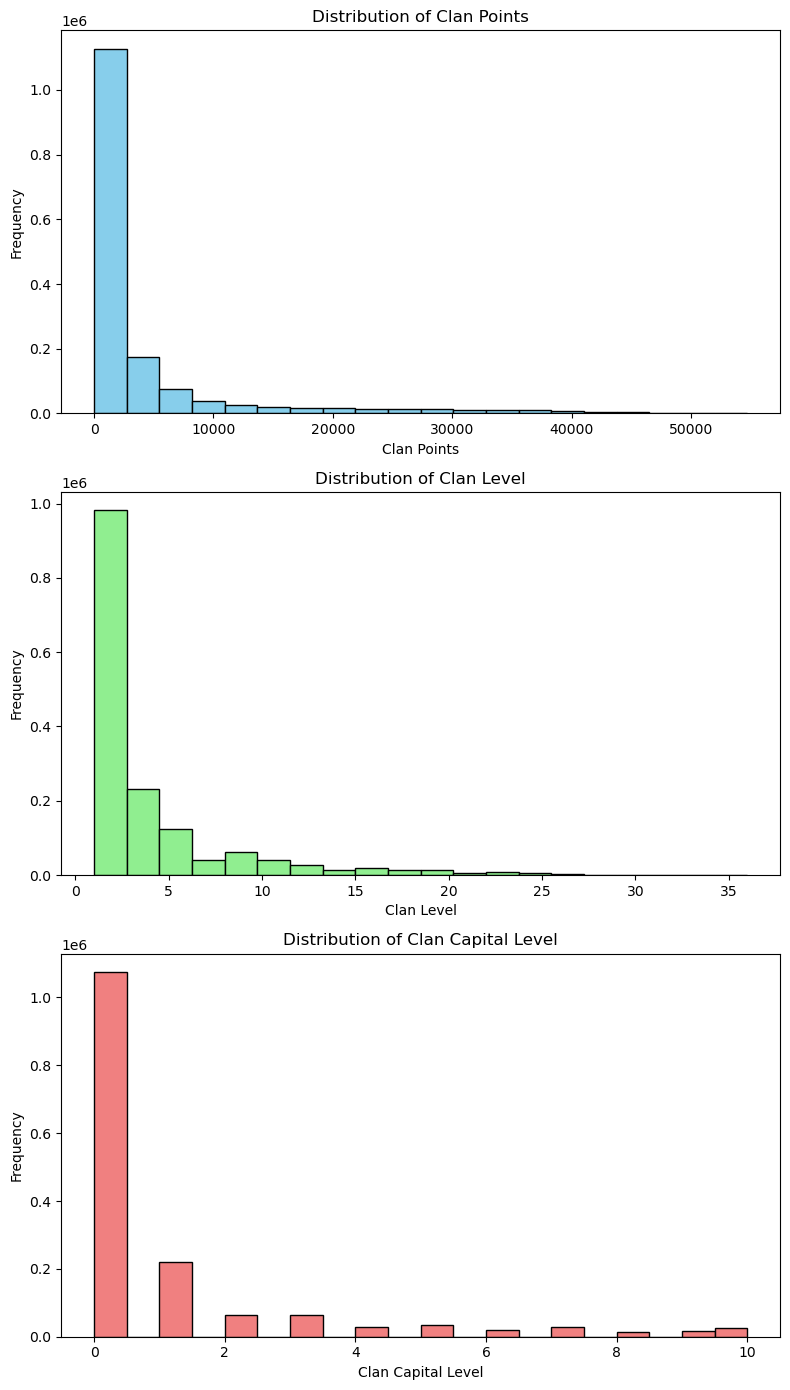

In [77]:
# Plotting histograms for the distribution of clan attributes
plt.figure(figsize=(8, 14))

# Clan Points
plt.subplot(3, 1, 1)
plt.hist(df['clan_points'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Clan Points')
plt.ylabel('Frequency')
plt.title('Distribution of Clan Points')

# Clan Level
plt.subplot(3, 1, 2)
plt.hist(df['clan_level'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Clan Level')
plt.ylabel('Frequency')
plt.title('Distribution of Clan Level')

# Clan Capital Level
plt.subplot(3, 1, 3)
plt.hist(df['clan_capital_hall_level'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Clan Capital Level')
plt.ylabel('Frequency')
plt.title('Distribution of Clan Capital Level')

# Other attributes as needed

plt.tight_layout()
plt.show()

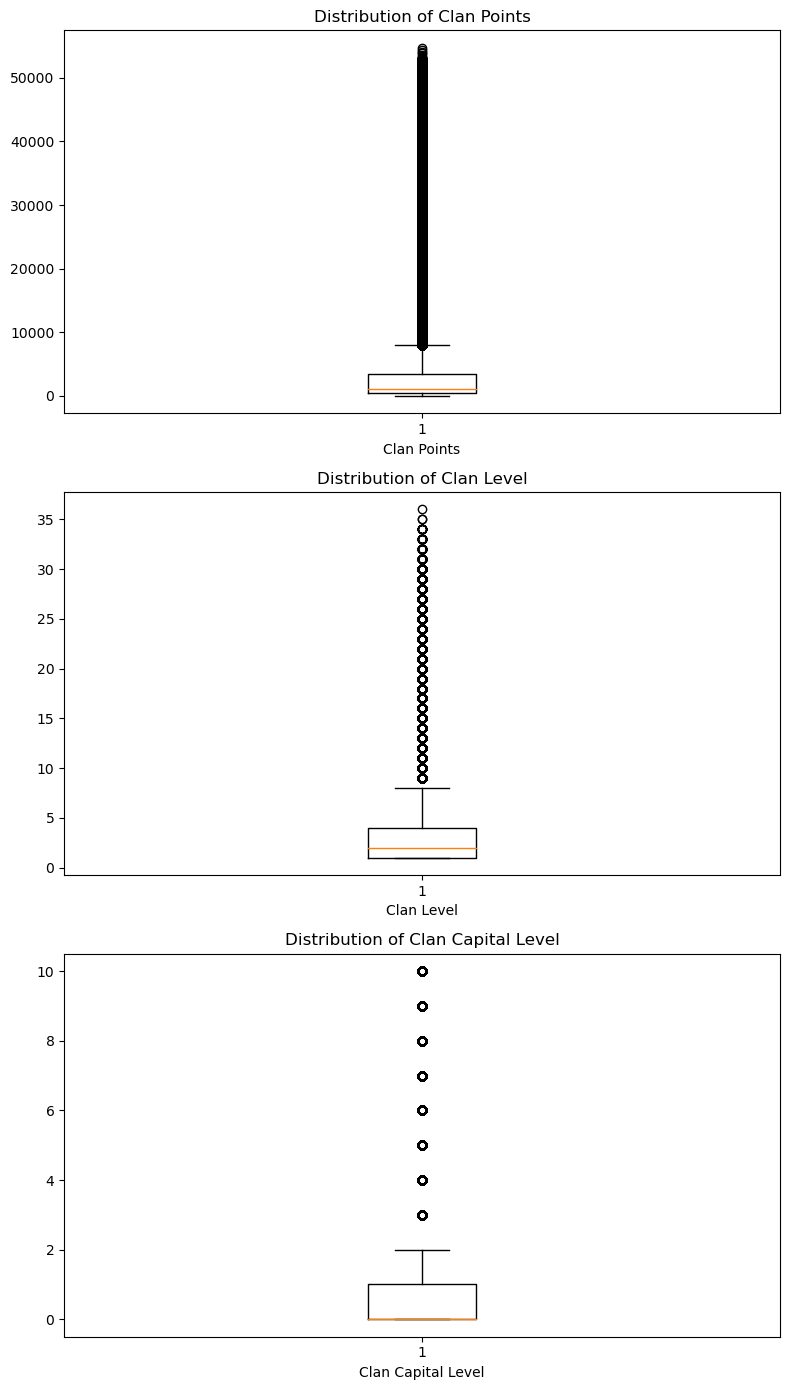

In [84]:
# Plotting Box Plot

plt.figure(figsize=(8, 14))

# Clan Points
plt.subplot(3, 1, 1)
plt.boxplot(df['clan_points'])
plt.xlabel('Clan Points')
plt.title('Distribution of Clan Points')

# Clan Level
plt.subplot(3, 1, 2)
plt.boxplot(df['clan_level'])
plt.xlabel('Clan Level')
plt.title('Distribution of Clan Level')

# Clan Capital Level
plt.subplot(3, 1, 3)
plt.boxplot(df['clan_capital_hall_level'])
plt.xlabel('Clan Capital Level')
plt.title('Distribution of Clan Capital Level')

# Other attributes as needed

plt.tight_layout()
plt.show()